In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
import plotly.express as px
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

In [3]:
df = pd.read_csv('D:\FYP2\studentdataset.csv')

In [4]:
df.head()

,guardianEncode,romanticEncode,internetEncode,higherEncode,nurseryEncode,activitiesEncode,paidEncode,famsupEncode,schoolsupEncode,reasonEncode,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Target
0,1,1,1,0,0,1,1,1,0,1,...,3,4,1,1,3,4,0,11,11,7.333333
1,0,1,0,0,1,1,1,0,1,1,...,3,3,1,1,3,2,9,11,11,10.333333
2,1,1,0,0,0,1,1,1,0,3,...,3,2,2,3,3,6,12,13,12,12.333333
3,1,0,0,0,0,0,1,0,1,0,...,2,2,1,1,5,0,14,14,14,14.000000
4,0,1,1,0,0,1,1,0,1,0,...,3,2,1,2,5,0,11,13,13,12.333333


In [4]:
df.shape

(1044, 34)

In [5]:
df.describe()

,guardianEncode,romanticEncode,internetEncode,higherEncode,nurseryEncode,activitiesEncode,paidEncode,famsupEncode,schoolsupEncode,reasonEncode,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Target
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,...,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,0.837165,0.644636,0.207854,0.085249,0.200192,0.505747,0.789272,0.386973,0.886015,1.197318,...,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954,11.267241
std,0.525767,0.478853,0.405967,0.279386,0.400335,0.500207,0.408021,0.487291,0.317945,0.927554,...,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796,3.218805
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.333333
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000,9.333333
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000,11.333333
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,13.333333
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.333333


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   guardianEncode    1044 non-null   int64  
 1   romanticEncode    1044 non-null   int64  
 2   internetEncode    1044 non-null   int64  
 3   higherEncode      1044 non-null   int64  
 4   nurseryEncode     1044 non-null   int64  
 5   activitiesEncode  1044 non-null   int64  
 6   paidEncode        1044 non-null   int64  
 7   famsupEncode      1044 non-null   int64  
 8   schoolsupEncode   1044 non-null   int64  
 9   reasonEncode      1044 non-null   int64  
 10  FjobEncode        1044 non-null   int64  
 11  MjobEncode        1044 non-null   int64  
 12  PstatusEncode     1044 non-null   int64  
 13  famsizeEncode     1044 non-null   int64  
 14  addressEncode     1044 non-null   int64  
 15  sexEncode         1044 non-null   int64  
 16  schoolEncode      1044 non-null   int64  


# Data Understanding

In [ ]:
plt.subplots(figsize=(8,12))
grade_counts = df['G3'].value_counts().sort_values().plot.barh(width=.9,color=sns.color_palette('inferno',40))
grade_counts.axes.set_title('Number of students who scored a particular grade',fontsize=30)
grade_counts.set_xlabel('Number of students', fontsize=30)
grade_counts.set_ylabel('Final Grade', fontsize=30)
plt.show()

In [ ]:
b = sns.countplot(df['G3'])
b.axes.set_title('Distribution of Final grade of students', fontsize = 30)
b.set_xlabel('Final Grade', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

In [ ]:
male_studs = len(df[df['sexEncode'] == 0])
female_studs = len(df[df['sexEncode'] == 1])
print('Number of male students:',male_studs)
print('Number of female students:',female_studs)

In [ ]:
b = sns.kdeplot(df['age'], shade=True)
b.axes.set_title('Ages of students', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

In [ ]:
x = df['age']

plt.hist(x)
plt.show() 

In [ ]:
b = sns.countplot('age',hue='sexEncode', data=df)
b.axes.set_title('Number of students in different age groups',fontsize=30)
b.set_xlabel("Age",fontsize=30)
b.set_ylabel("Count",fontsize=20)
plt.show()

In [ ]:
# Grade distribution by address
sns.kdeplot(df.loc[df['higherEncode'] == 0, 'G3'], label='Urban', shade = True)
sns.kdeplot(df.loc[df['higherEncode'] == 1, 'G3'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?', fontsize = 20)
plt.xlabel('Grade', fontsize = 20);
plt.ylabel('Density', fontsize = 20)
plt.show()

In [ ]:
correlation = df.corr()

In [ ]:
correlation['G3'].sort_values(ascending=False)

In [ ]:
corr = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True)

In [ ]:
df.isnull().any()

In [ ]:
df.corr()

In [ ]:
sns.catplot('schoolEncode',data=df,kind='count')

In [ ]:
sns.barplot(df['age'],df['failures'],hue=df['sexEncode'],palette='viridis')

In [ ]:
df.skew().sort_values(ascending=False)

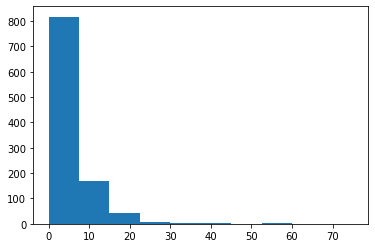

In [5]:
x = df['absences']

plt.hist(x)
plt.show()

C:\Users\See\AppData\Local\Temp\ipykernel_32840\4283695574.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'guardianEncode'}>,
        <AxesSubplot:title={'center':'romanticEncode'}>,
        <AxesSubplot:title={'center':'internetEncode'}>,
        <AxesSubplot:title={'center':'higherEncode'}>,
        <AxesSubplot:title={'center':'nurseryEncode'}>,
        <AxesSubplot:title={'center':'activitiesEncode'}>],
       [<AxesSubplot:title={'center':'paidEncode'}>,
        <AxesSubplot:title={'center':'famsupEncode'}>,
        <AxesSubplot:title={'center':'schoolsupEncode'}>,
        <AxesSubplot:title={'center':'reasonEncode'}>,
        <AxesSubplot:title={'center':'FjobEncode'}>,
        <AxesSubplot:title={'center':'MjobEncode'}>],
       [<AxesSubplot:title={'center':'PstatusEncode'}>,
        <AxesSubplot:title={'center':'famsizeEncode'}>,
        <AxesSubplot:title={'center':'addressEncode'}>,
        <AxesSubplot:title={'center':'sexEncode'}>,
        <AxesSubplot:title={'center':'schoolEncode'}>,
        <AxesSubplot:title={'center':'age'}>],
       [

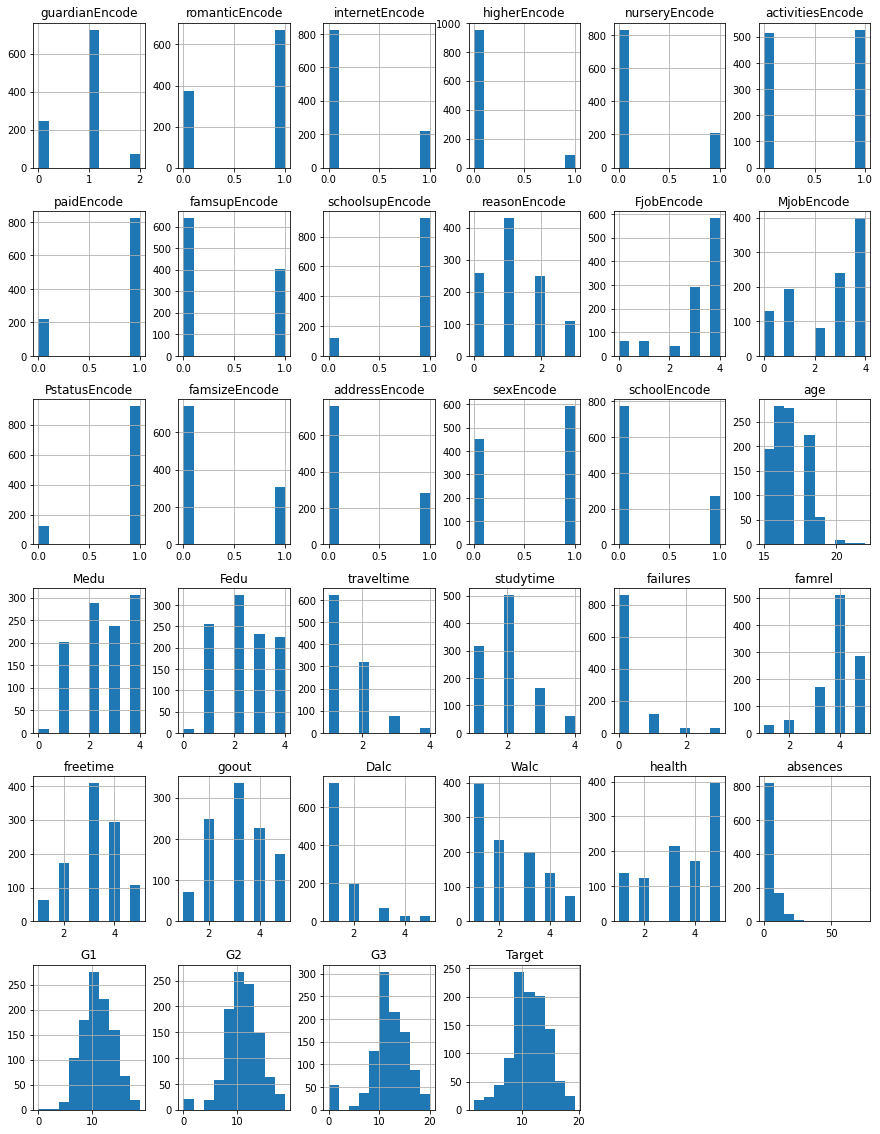

In [34]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

# Outlier

In [5]:
df.describe()

,guardianEncode,romanticEncode,internetEncode,higherEncode,nurseryEncode,activitiesEncode,paidEncode,famsupEncode,schoolsupEncode,reasonEncode,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Target
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,...,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,0.837165,0.644636,0.207854,0.085249,0.200192,0.505747,0.789272,0.386973,0.886015,1.197318,...,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954,11.267241
std,0.525767,0.478853,0.405967,0.279386,0.400335,0.500207,0.408021,0.487291,0.317945,0.927554,...,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796,3.218805
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.333333
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000,9.333333
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000,11.333333
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,13.333333
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.333333


C:\Users\See\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='absences'>

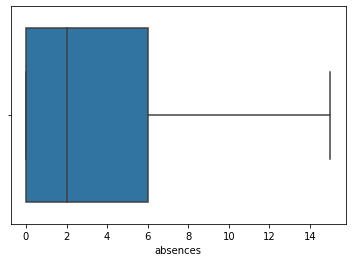

In [8]:
sns.boxplot(df['absences'],data=df)

In [7]:
Q1 = df['absences'].quantile(0.25)
Q3 = df['absences'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
I=Q3 + (whisker_width*IQR)

df["absences"] = df["absences"].mask(df["absences"] >I,  df['absences'].median())

In [10]:
I

15.0

#  Handle Imbalanced data

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

# Classify


In [11]:
df.loc[df.G3 <= 9, 'G3'] = 0
df.loc[df.G3 > 9, 'G3'] = 1

# Split Data

In [12]:
del df['Target']

In [13]:
#independent Variable
X = df[['studytime','failures', 'absences', 'G1', 'G2']]
Y=df['G3']
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=20,shuffle=True)

In [ ]:
X.info()

# Build Classification Model

In [14]:
X_train.head()

,studytime,failures,absences,G1,G2
947,4,0,0.0,14,13
520,2,0,6.0,6,8
165,3,0,2.0,13,13
1035,1,0,7.0,6,5
7,2,0,2.0,10,13


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 22, p=1, leaf_size=1)
#FIT the classifier to the data
knn.fit(X_train, Y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=22, p=1)

In [16]:
y_pred = knn.predict(X_test)

y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [17]:
knn.score(X_test, Y_test)


0.9282296650717703

In [18]:
for i in range(len(X_test)):
    print("X=%s, Predicted=%s" % (X_test[:i], y_pred[:i]))

X=Empty DataFrame
Columns: [studytime, failures, absences, G1, G2]
Index: [], Predicted=[]
X=     studytime  failures  absences  G1  G2
951          3         0       0.0  15  12, Predicted=[1]
X=     studytime  failures  absences  G1  G2
951          3         0       0.0  15  12
525          3         0       0.0  15  14, Predicted=[1 1]
X=     studytime  failures  absences  G1  G2
951          3         0       0.0  15  12
525          3         0       0.0  15  14
589          1         0       0.0   7  10, Predicted=[1 1 1]
X=     studytime  failures  absences  G1  G2
951          3         0       0.0  15  12
525          3         0       0.0  15  14
589          1         0       0.0   7  10
354          2         0       2.0  12  12, Predicted=[1 1 1 1]
X=     studytime  failures  absences  G1  G2
951          3         0       0.0  15  12
525          3         0       0.0  15  14
589          1         0       0.0   7  10
354          2         0       2.0  12  12
909       

 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0]
X=     studytime  failures  absences  G1  G2
951          3         0       0.0  15  12
525          3         0       0.0  15  14
589          1         0       0.0   7  10
354          2         0       2.0  12  12
909          2         0       2.0  17  18
..         ...       ...       ...  ..  ..
32           2         0       0.0  13  14
434          4         0       4.0  10   9
472          1         0       0.0  14  14
629          1         0       4.0   7   8
855          2         3       5.0   7   7

[106 rows x 5 columns], Predicted=[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0]
X=     studytime  failures  absences  G1  G2
951          3         0       0.0  15  12
525          3         0       0.0  15  14
589          1         0       0.0  

X=     studytime  failures  absences  G1  G2
951          3         0       0.0  15  12
525          3         0       0.0  15  14
589          1         0       0.0   7  10
354          2         0       2.0  12  12
909          2         0       2.0  17  18
..         ...       ...       ...  ..  ..
771          2         0       2.0  13  13
337          3         0       0.0  17  18
879          2         0      14.0  13  13
889          2         0      14.0  12  12
711          2         0       4.0   8  10

[190 rows x 5 columns], Predicted=[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1
 1 1 1 1 1]
X=     studytime  failures  absences  G1  G2
951          3 

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

print(accuracy_score(Y_test,y_pred))

Confusion matrix

 [[ 35  10]
 [  5 159]]

True Positives(TP) =  35

True Negatives(TN) =  159

False Positives(FP) =  10

False Negatives(FN) =  5
0.9282296650717703


# Hyperparameter Tuning

Text(91.68, 0.5, 'predicted class')

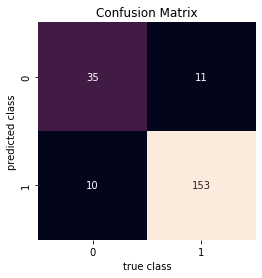

In [27]:
# Confusion matrix
matrix = confusion_matrix(Y_test, y_pred)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('true class')
plt.ylabel('predicted class')

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2,3]
weights = ['distance','uniform']
metric = ['euclidean','manhattan','minkowski']
algorithm = ['ball_tree','kd_tree']

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p, weights=weights, metric=metric,algorithm=algorithm)

knn_2 = KNeighborsClassifier()

clf = GridSearchCV(knn_2, hyperparameters, cv=10)

best_model = clf.fit(X,Y)

print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])